In [176]:
!pip install pandas --quiet

In [177]:
import pandas as pd
from pathlib import Path
pd.__version__

'1.5.3'

In [178]:
import numpy as np

In [179]:
!wget -O Machine_temp_failure_missing.csv "https://drive.google.com/uc?export=download&id=17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG"


--2023-06-01 18:08:10--  https://drive.google.com/uc?export=download&id=17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG
Resolving drive.google.com (drive.google.com)... 209.85.200.101, 209.85.200.139, 209.85.200.100, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j11sot0dg8mv3g8up187n06tl51reirp/1685642850000/12842633363256377808/*/17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG?e=download&uuid=eed00a3c-13a9-4612-b975-214f18e1e64e [following]
--2023-06-01 18:08:11--  https://doc-08-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j11sot0dg8mv3g8up187n06tl51reirp/1685642850000/12842633363256377808/*/17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG?e=download&uuid=eed00a3c-13a9-4612-b975-214f18e1e64e
Resolving doc-08-98-docs.googleusercontent.com (doc-08-98-docs.googleusercontent.com)... 172.217.219.132, 2607

In [180]:
filepath = Path('./Machine_temp_failure_missing.csv')

In [181]:
ts = pd.read_csv(filepath, header=0, parse_dates=['timestamp'], index_col=0, usecols=['timestamp','value'])
ts.head()

,value
timestamp,
2013-02-12 21:15:00,73.967322
2013-02-12 21:20:00,74.935882
2013-02-12 21:25:00,76.124162
2013-02-12 21:30:00,78.140707
2013-02-12 21:35:00,79.329836


In [182]:
missing_values = ts.isnull()
missing_counts = missing_values.sum()
print(missing_counts)
print(missing_values)


value    1285
dtype: int64
                     value
timestamp                 
2013-02-12 21:15:00  False
2013-02-12 21:20:00  False
2013-02-12 21:25:00  False
2013-02-12 21:30:00  False
2013-02-12 21:35:00  False
...                    ...
2014-02-19 15:05:00  False
2014-02-19 15:10:00  False
2014-02-19 15:15:00  False
2014-02-19 15:20:00  False
2014-02-19 15:25:00  False

[22695 rows x 1 columns]


In [183]:
#ts = ts.fillna(0)


In [184]:
#missing_values = ts.isnull()
#missing_counts = missing_values.sum()
#print(missing_counts)
#print(missing_values)

In [185]:
ts.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [186]:
ts = ts.rename(columns={'value': 'temperature'})
ts.head()

,temperature
timestamp,
2013-02-12 21:15:00,73.967322
2013-02-12 21:20:00,74.935882
2013-02-12 21:25:00,76.124162
2013-02-12 21:30:00,78.140707
2013-02-12 21:35:00,79.329836


In [187]:
ts['delta_temperature'] = ts['temperature'].shift(-1) - ts['temperature']
print(ts)

                     temperature  delta_temperature
timestamp                                          
2013-02-12 21:15:00    73.967322           0.968560
2013-02-12 21:20:00    74.935882           1.188280
2013-02-12 21:25:00    76.124162           2.016546
2013-02-12 21:30:00    78.140707           1.189128
2013-02-12 21:35:00    79.329836          -0.619417
...                          ...                ...
2014-02-19 15:05:00    98.185415          -0.381246
2014-02-19 15:10:00    97.804168          -0.668700
2014-02-19 15:15:00    97.135468           0.921384
2014-02-19 15:20:00    98.056852          -1.152991
2014-02-19 15:25:00    96.903861                NaN

[22695 rows x 2 columns]


In [188]:
import matplotlib.pyplot as plt


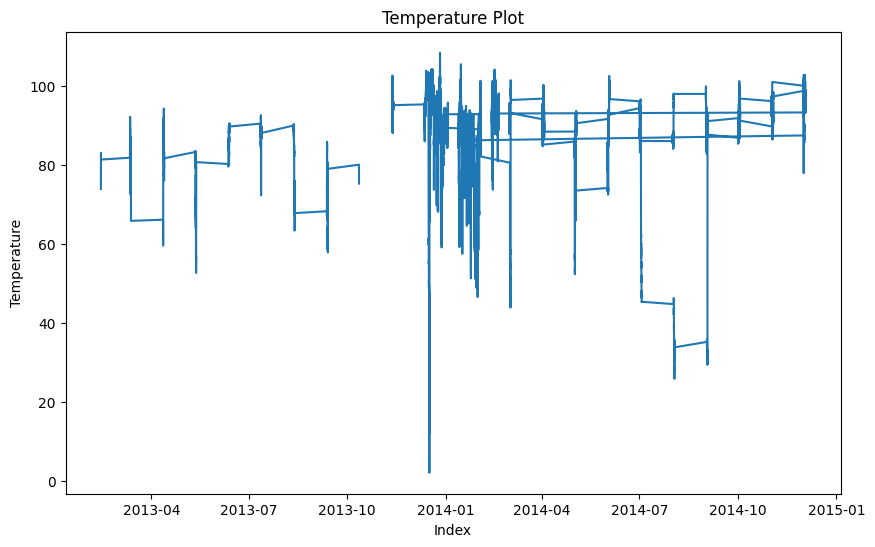

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(ts['temperature'])
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.show()

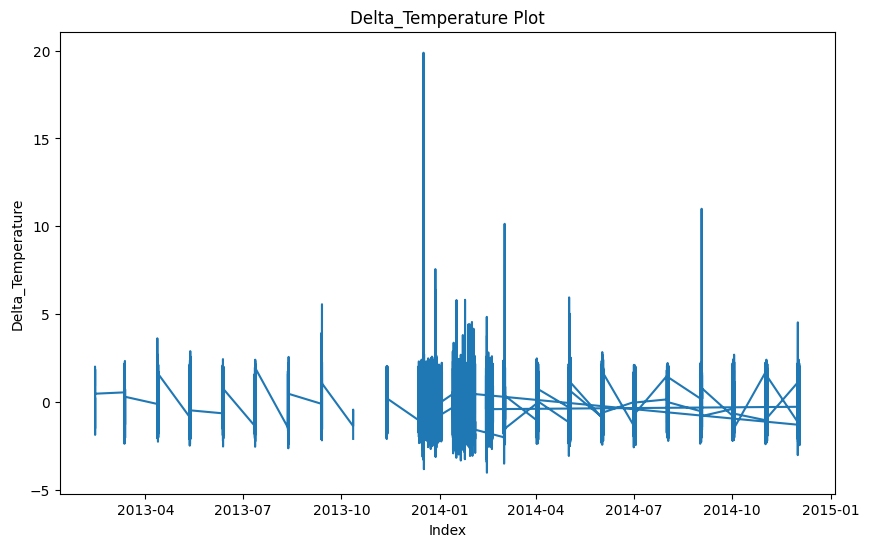

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(ts['delta_temperature'])
plt.xlabel('Index')
plt.ylabel('Delta_Temperature')
plt.title('Delta_Temperature Plot')
plt.show()

In [191]:
ts['color'] = ts['temperature'].apply(lambda x: 'red' if x > 70.00 else 'blue')

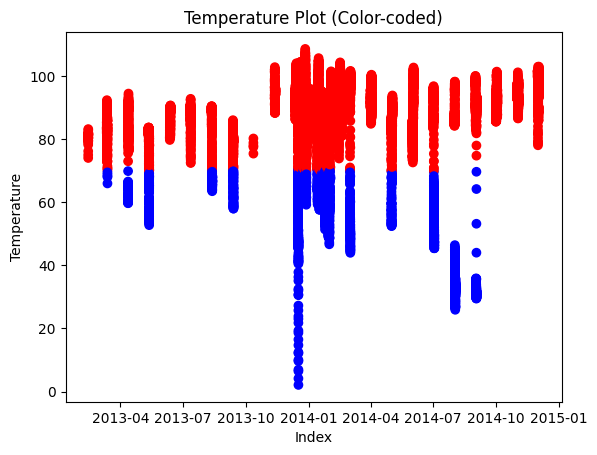

In [192]:
plt.scatter(ts.index, ts['temperature'], c=ts['color'])
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot (Color-coded)')
plt.show()

In [193]:
def read_dataset(folder, date_col=None):
    '''
    folder: is a Path object
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    ts = pd.read_csv(folder, 
                     index_col=0, 
                     parse_dates=[date_col])
    return ts

In [194]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [195]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [196]:
ts = ts.drop('delta_temperature', axis=1)
ts = ts.drop('color', axis=1)

In [197]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22695 entries, 2013-02-12 21:15:00 to 2014-02-19 15:25:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  21410 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB


In [198]:
ts.describe(include="all")

,temperature
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [199]:
ts.isnull().sum()

temperature    1285
dtype: int64

In [200]:
!wget -O Machine_temp_failure_original.csv "https://drive.google.com/uc?export=download&id=1kulRVMpepw903zqZAIETRHR3CKCw9hCT"

--2023-06-01 18:08:16--  https://drive.google.com/uc?export=download&id=1kulRVMpepw903zqZAIETRHR3CKCw9hCT
Resolving drive.google.com (drive.google.com)... 209.85.200.101, 209.85.200.139, 209.85.200.100, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4irpnrub9etarlsmfok0i0jarv0ddr3f/1685642850000/12842633363256377808/*/1kulRVMpepw903zqZAIETRHR3CKCw9hCT?e=download&uuid=fc7c26d7-e205-4ea2-9202-8e30e3bc3648 [following]
--2023-06-01 18:08:16--  https://doc-0s-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4irpnrub9etarlsmfok0i0jarv0ddr3f/1685642850000/12842633363256377808/*/1kulRVMpepw903zqZAIETRHR3CKCw9hCT?e=download&uuid=fc7c26d7-e205-4ea2-9202-8e30e3bc3648
Resolving doc-0s-98-docs.googleusercontent.com (doc-0s-98-docs.googleusercontent.com)... 172.217.219.132, 2607

In [201]:
folder = Path('./Machine_temp_failure_original.csv')
ts_org = read_dataset(folder,'timestamp')

In [202]:
ts_org.head()

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


In [203]:
ts_org = ts_org.rename(columns={'value': 'temperature'})
ts_org.head()

,temperature
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


In [204]:
ts_org.isnull().sum()

temperature    0
dtype: int64

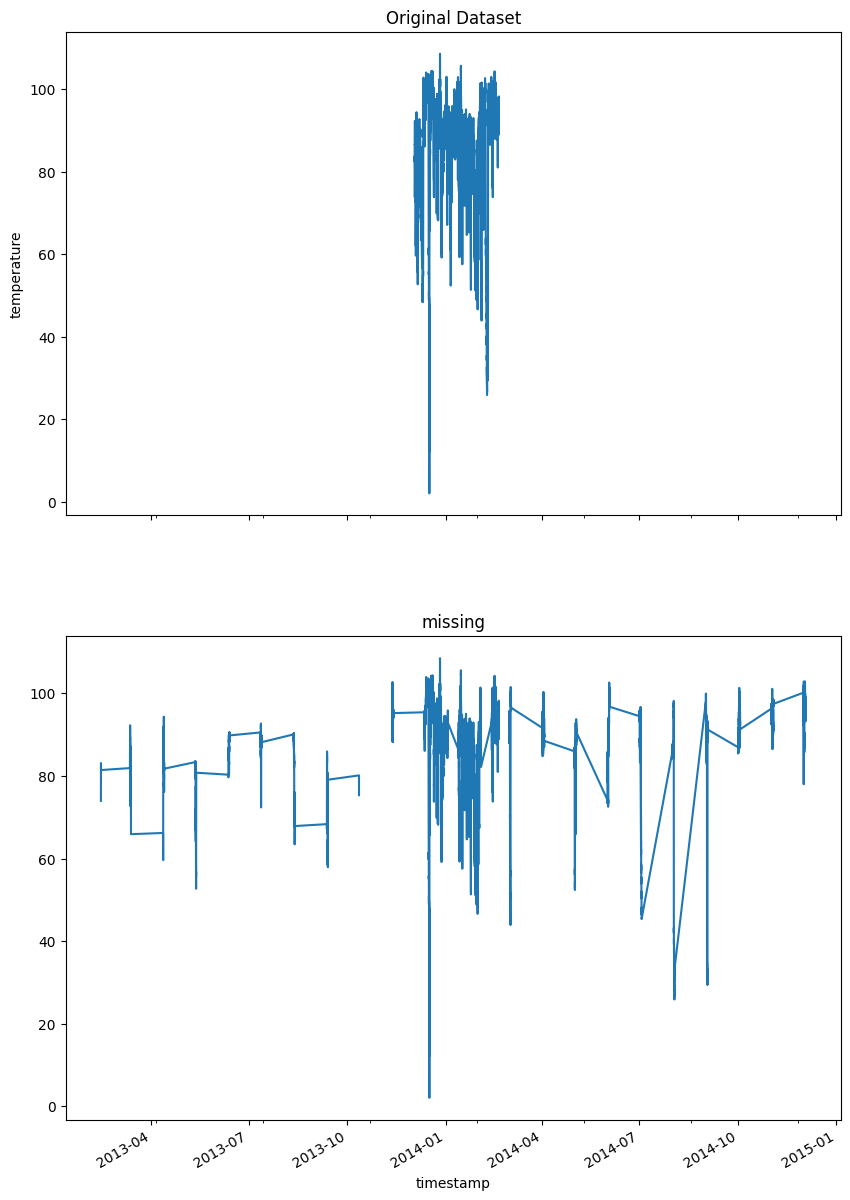

In [205]:
plot_dfs(ts_org, 
          ts, 
         'temperature',
         title="Temperature",
         xlabel="Index",
         ylabel="temperature")

In [206]:
ts['ffill'] = ts['temperature'].fillna(method='ffill')
ts['bfill'] = ts['temperature'].fillna(method='bfill')
ts['mean'] = ts['temperature'].fillna(ts['temperature'].mean())

In [207]:
_ = rmse_score(ts_org, 
                    ts, 
                    'temperature')

RMSE for ffill: 1.4666115658526897
RMSE for bfill: 5.538329974927272
RMSE for mean: 2.6118121108260417


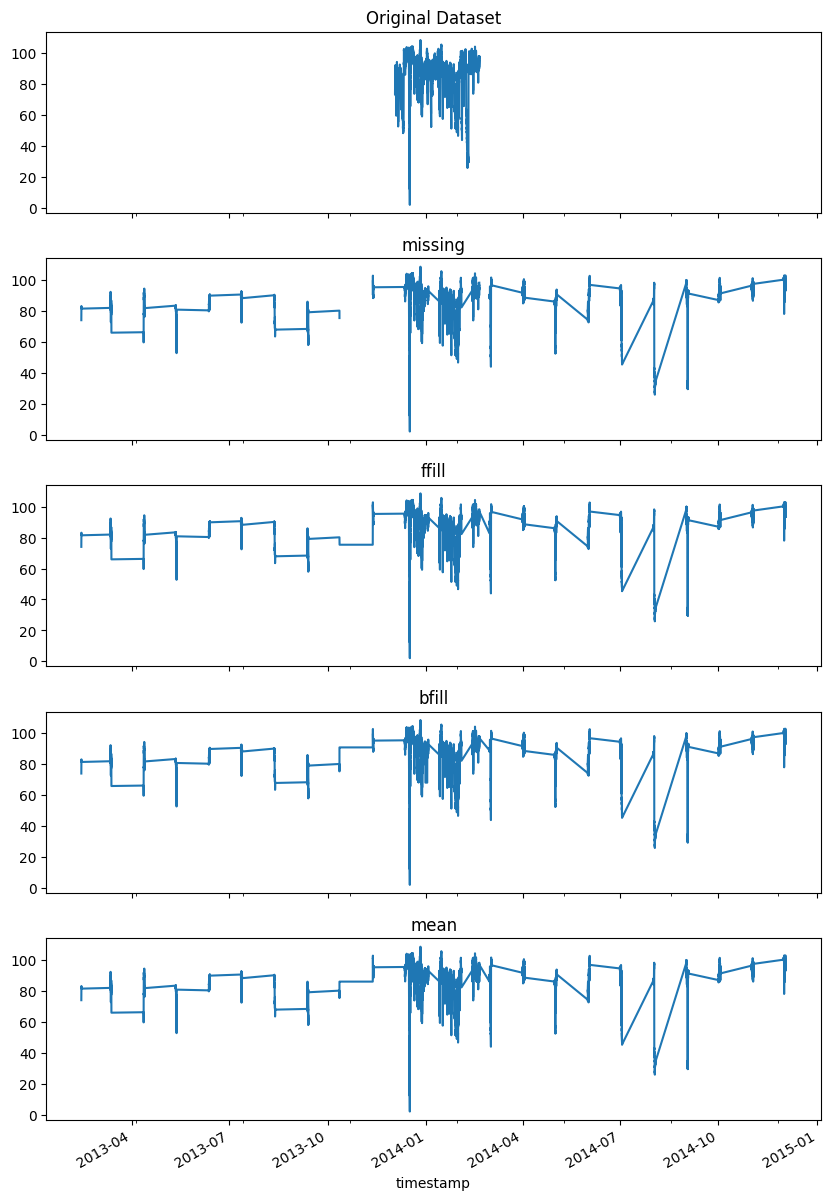

In [208]:
plot_dfs(ts_org, ts, 'temperature')

In [209]:
from sklearn.impute import SimpleImputer

In [210]:
folder = Path('./Machine_temp_failure_original.csv')
ts_org1 = read_dataset(folder,'timestamp')
ts_org1 = ts_org1.rename(columns={'value': 'temperature'})

In [211]:
folder = Path('./Machine_temp_failure_missing.csv')
df = read_dataset(folder,'timestamp')

In [212]:
df = df.rename(columns={'value': 'temperature'})

In [213]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [214]:
df_vals = df['temperature'].values.reshape(-1,1)

for s_name, s in strategy:
    df[s_name] = (
        SimpleImputer(strategy=s).fit_transform(df_vals))

In [215]:
df.head()

,temperature,Mean Strategy,Median Strategy,Most Frequent Strategy
timestamp,,,,
2013-02-12 21:15:00,73.967322,73.967322,73.967322,73.967322
2013-02-12 21:20:00,74.935882,74.935882,74.935882,74.935882
2013-02-12 21:25:00,76.124162,76.124162,76.124162,76.124162
2013-02-12 21:30:00,78.140707,78.140707,78.140707,78.140707
2013-02-12 21:35:00,79.329836,79.329836,79.329836,79.329836


In [216]:
_ = rmse_score(ts_org1, df, 'temperature')

RMSE for Mean Strategy: 2.6118121108260417
RMSE for Median Strategy: 2.0176725629240635
RMSE for Most Frequent Strategy: 22.936820075564288


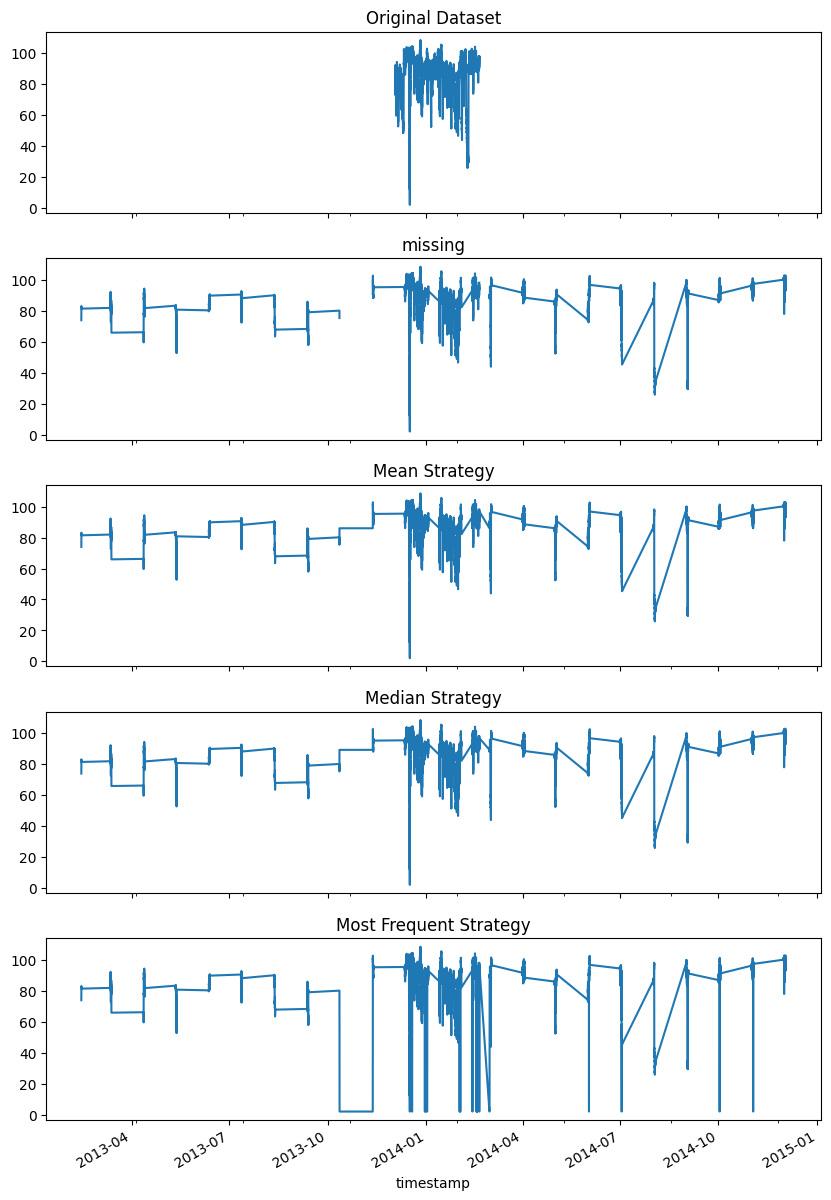

In [217]:
plot_dfs(ts_org1, df, 'temperature')

In [218]:
folder = Path('./Machine_temp_failure_original.csv')
ts_org2 = read_dataset(folder,'timestamp')
ts_org2 = ts_org2.rename(columns={'value': 'temperature'})

In [219]:
folder = Path('./Machine_temp_failure_missing.csv')
df1 = read_dataset(folder,'timestamp')

In [220]:
df1 = df1.rename(columns={'value': 'temperature'})

In [221]:
df1.interpolate()

,temperature
timestamp,
2013-02-12 21:15:00,73.967322
2013-02-12 21:20:00,74.935882
2013-02-12 21:25:00,76.124162
2013-02-12 21:30:00,78.140707
2013-02-12 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [222]:
df1.columns

Index(['temperature'], dtype='object')

In [224]:
interpolations = [
    'linear',
    'quadratic',
    'nearest',
    'cubic',
]
df1 = df1[~df1.index.duplicated()]

for intp in interpolations:
    df1[intp] = df1['temperature'].interpolate(method=intp)



<ipython-input-224-bac28c816b8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[intp] = df1['temperature'].interpolate(method=intp)
<ipython-input-224-bac28c816b8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[intp] = df1['temperature'].interpolate(method=intp)
<ipython-input-224-bac28c816b8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [225]:
_ = rmse_score(ts_org2, df1, 'temperature')

RMSE for linear: 3.4745265473020495
RMSE for quadratic: 13.078876205037874
RMSE for nearest: 2.2136803493321584
RMSE for cubic: 16.264769197704556


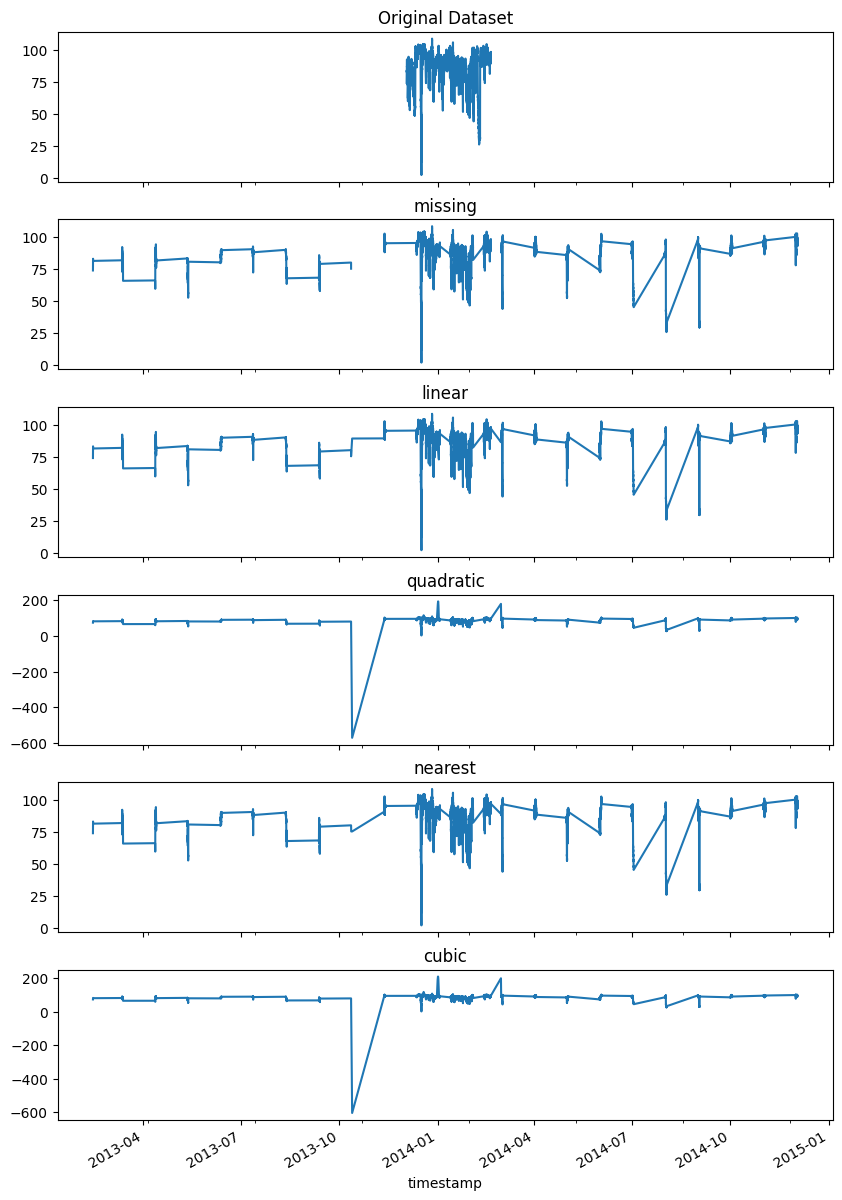

In [226]:
cols = ['temperature', 'linear', 'quadratic','nearest', 'cubic']
plot_dfs(ts_org2, df1[cols], 'temperature')

In [227]:
frequency = ts['temperature'].value_counts()
print(frequency)

73.967322    1
79.926638    1
77.842853    1
78.705237    1
78.184969    1
            ..
85.841295    1
86.896794    1
86.182052    1
85.922123    1
96.903861    1
Name: temperature, Length: 21410, dtype: int64


In [228]:
ts.head()

,temperature,ffill,bfill,mean
timestamp,,,,
2013-02-12 21:15:00,73.967322,73.967322,73.967322,73.967322
2013-02-12 21:20:00,74.935882,74.935882,74.935882,74.935882
2013-02-12 21:25:00,76.124162,76.124162,76.124162,76.124162
2013-02-12 21:30:00,78.140707,78.140707,78.140707,78.140707
2013-02-12 21:35:00,79.329836,79.329836,79.329836,79.329836


In [232]:
ts_org.resample('H').ffill().head()

ValueError: ignored